In [8]:
#画图
import matplotlib as mpl 
import matplotlib.pyplot as plt
#在notebook里画图
%matplotlib inline
import numpy as np
import sklearn
#处理数据
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)



2.0.0
sys.version_info(major=3, minor=7, micro=9, releaselevel='final', serial=0)
matplotlib 3.3.4
numpy 1.19.2
pandas 1.2.1
sklearn 0.23.2
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [9]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test) = fashion_mnist.load_data()
x_valid,x_train = x_train_all[:5000],x_train_all[5000:]
y_valid,y_train = y_train_all[:5000],y_train_all[5000:]

print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [16]:
print(np.max(x_train),np.min(x_train))

255 0


In [17]:
# x = (x-u均值)/ std方差
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

In [19]:
print(np.max(x_train_scaled),np.min(x_train_scaled))

2.0231433 -0.8105136


In [ ]:
# tf.keras.models.Sequential
"""
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))
"""
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(400,activation="relu"),
    keras.layers.Dense(200,activation="relu"),
    keras.layers.Dense(10,activation="softmax"),
])

#relu: y=max(0,x)
#softmax: 将向量分布变成概率分布 x=[x1,x2,x3]
#         y=[e^x1/sum,e^x2/sum,e^x3/sum],sum=e^x1+e^x2+e^x3

#如果y 只是一个数就是用sparse_.. 如果y是一个向量就使用categorical_crossentropy
#sgd 梯度下降 求导 更新参数
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])



#激活函数
* Sigmoid 
* Leaky ReLU
* tanh
* Maxout
* ReLU
* ELU
归一化 使得梯度下降的方向与等高线的法线方向一致 数据收敛更快
dropout 随机抛弃一些节点 防止模型记住数据 一般用在过拟合的场景中（测试数据准确率很高 而验证集很低）

In [23]:
logdir ='./callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file=os.path.join(logdir,"fashion_mnist_model.h5")

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,save_best_only = True),
    keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3),
]

history=model.fit(x_train_scaled,y_train,epochs=10,validation_data=(x_valid_scaled,y_valid),callbacks=callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 7s 126us/sample - loss: 0.3219 - accuracy: 0.8837 - val_loss: 0.3387 - val_accuracy: 0.8768
Epoch 2/10
55000/55000 [==============================] - 7s 127us/sample - loss: 0.3017 - accuracy: 0.8904 - val_loss: 0.3284 - val_accuracy: 0.8838
Epoch 3/10
55000/55000 [==============================] - 7s 127us/sample - loss: 0.2863 - accuracy: 0.8969 - val_loss: 0.3169 - val_accuracy: 0.8870
Epoch 4/10
55000/55000 [==============================] - 7s 131us/sample - loss: 0.2719 - accuracy: 0.9022 - val_loss: 0.3061 - val_accuracy: 0.8894
Epoch 5/10
55000/55000 [==============================] - 7s 129us/sample - loss: 0.2598 - accuracy: 0.9068 - val_loss: 0.3173 - val_accuracy: 0.8892
Epoch 6/10
55000/55000 [==============================] - 7s 128us/sample - loss: 0.2465 - accuracy: 0.9108 - val_loss: 0.3062 - val_accuracy: 0.8902
Epoch 7/10
55000/55000 [===========================

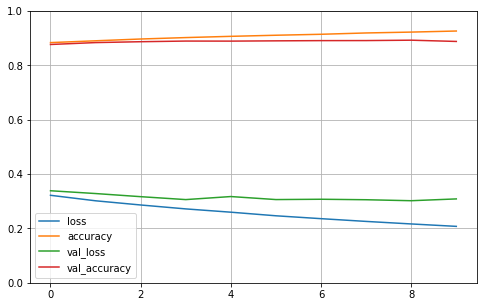

In [24]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    
plot_learning_curves(history)

In [ ]:
model.evaluate(x_test,y_test)